In [1]:
import sys
sys.path.append("eval/")
sys.path.append("models/")

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import util_gcnn
import util_results
plt.rcParams.update({"font.size":10})

from setup import *

%load_ext autoreload
%autoreload 2

In [4]:
#out_folder = "2104_rc_new1/"
out_folder = "2106_rc_bootstrap/"
result_file = "rail_catchment_mve_results.csv"

In [9]:
results = pd.read_csv(project_dir+"results/"+out_folder+result_file)
results = results[results['test_nll_loss']<1000]
results['val_rmse'] = np.sqrt(results['val_mse'])
results['test_rmse'] = np.sqrt(results['test_mse'])
results['Adjacency'] = pd.Categorical(results['Adjacency'], 
                        ['func','euc','con','net','func_euc','func_con','func_net','func_euc_con_net'])

# Top Models to Ensemble

In [10]:
before = results[(results['Period']=='before')&(results['Adjacency']=='func_euc_con_net')&(results['Lookback']==2)]
before = before.sort_values(by='val_nll_loss')
print(before.head(10)['Model'].astype(int).tolist())
print(before.head(10)[['Model', 'val_nll_loss','val_u','val_mae','val_mpiw','val_picp',\
                       'test_nll_loss','test_u','test_mae','test_mpiw','test_picp']])

[83, 190, 99, 95, 81, 100, 101, 57, 93, 106]
     Model  val_nll_loss     val_u  val_mae    val_mpiw  val_picp  \
83      83         92.27  0.047568    54.48  347.135148  0.951788   
190    190         92.58  0.054784    57.36  389.011311  0.959770   
99      99         92.59  0.057717    57.31  406.324616  0.955300   
95      95         92.78  0.061924    58.86  385.556750  0.957854   
81      81         92.80  0.058707    59.29  414.920549  0.959451   
100    100         92.81  0.058297    58.42  419.608372  0.964879   
101    101         92.83  0.049835    54.96  408.989881  0.962324   
57      57         92.85  0.065009    60.55  442.972351  0.964240   
93      93         92.86  0.057795    57.99  433.418703  0.967114   
106    106         92.92  0.050419    54.71  385.726622  0.959451   

     test_nll_loss    test_u  test_mae   test_mpiw  test_picp  
83           94.56  0.090405     69.88  380.476648   0.958413  
190          94.79  0.093893     71.13  451.120467   0.962857  
99 

In [15]:
before = results[(results['Period']=='before')&(results['Adjacency']=='func_euc_con_net')&(results['Lookback']==2)]
before = before.sort_values(by='val_nll_loss')
print(before.head(10)['Model'].astype(int).tolist())
print(before.head(10)[['Model', 'val_nll_loss','val_u','val_mae','val_mpiw','val_picp',\
                       'test_nll_loss','test_u','test_mae','test_mpiw','test_picp']])

[97, 107, 95, 103, 101, 86, 191, 94, 70, 59]
     Model  val_nll_loss     val_u  val_mae    val_mpiw  val_picp  \
107     97         91.45  0.058557    53.47  346.501253  0.955619   
117    107         91.65  0.048193    53.30  301.781693  0.946360   
105     95         91.78  0.044685    50.91  339.729828  0.955619   
113    103         91.85  0.042268    50.15  326.406334  0.952746   
111    101         91.87  0.041652    50.28  314.146423  0.948276   
96      86         91.88  0.051836    52.65  326.558296  0.954023   
201    191         91.89  0.045965    50.15  341.664815  0.951788   
104     94         91.91  0.044820    51.48  364.168268  0.963921   
80      70         91.94  0.044079    51.13  368.404211  0.959132   
69      59         91.97  0.043570    51.34  350.430657  0.962324   

     test_nll_loss    test_u  test_mae   test_mpiw  test_picp  
107          94.38  0.086587     67.57  356.241250   0.952381  
117          94.09  0.085632     66.54  370.759133   0.955873  
105

In [16]:
after = results[(results['Period']=='after')&(results['Adjacency']=='func_euc_con_net')&(results['Lookback']==2)]
after = after.sort_values(by='val_nll_loss')
print(after.head(10)['Model'].astype(int).tolist())
print(after.head(10)[['Model', 'val_nll_loss','val_u','val_mae','val_mpiw','val_picp',\
                       'test_nll_loss','test_u','test_mae','test_mpiw','test_picp']])

[11, 63, 93, 171, 6, 59, 5, 72, 33, 10]
     Model  val_nll_loss     val_u  val_mae   val_mpiw  val_picp  \
319     11         71.28  0.099407    15.50  83.746230  0.952698   
371     63         71.36  0.095689    15.13  76.046106  0.947619   
401     93         71.40  0.090956    14.98  74.198376  0.949524   
479    171         71.42  0.092112    14.97  74.543048  0.943492   
314      6         71.42  0.092876    15.16  80.507765  0.947937   
367     59         71.43  0.101012    15.73  70.750504  0.945397   
313      5         71.45  0.093322    15.33  82.231974  0.950476   
380     72         71.46  0.094250    15.06  72.890572  0.940952   
341     33         71.47  0.088585    14.62  74.536977  0.937143   
318     10         71.48  0.098138    15.28  80.314201  0.941905   

     test_nll_loss    test_u  test_mae  test_mpiw  test_picp  
319          70.70  0.083462     13.97  84.695839   0.955873  
371          70.42  0.078357     13.70  78.314187   0.964444  
401          70.65  0.

# Compare parameters (for Appendix)

In [6]:
def heatmap(df, title):
    fig, ax = plt.subplots()
    im = ax.imshow(df)
    ax.set_xticks(np.arange(len(df.columns)))
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.index)
    ax.set_xlabel(df.columns.name)
    ax.set_ylabel(df.index.name)
    cax = fig.add_axes([0.9, 0.1, 0.025, 0.78])
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_title(title)

In [17]:
def boxplot(df, groupby, cmap, plot_measures):
    df_mean = df.mean()
    grouped = df.groupby(groupby, as_index=False).agg(list)
    f = []
    for i in grouped['Model']:
        if len(i)==0:
            f.append(False)
        else:
            f.append(True)
    grouped = grouped[f]
    fig, ax = plt.subplots(figsize=(max([len(grouped)*3,6]),max([len(grouped),3])))
    
    colors = get_colors(cmap,len(plot_measures))
    bplots = []
    for i in plot_measures:
        idx = plot_measures.index(i)
        bplot = ax.boxplot([l/df_mean[i] for l in grouped[i]],widths=0.3,sym='',patch_artist=True,
                   positions=np.arange(idx*0.4, idx*0.4+(len(plot_measures)*0.4+0.5)*(len(grouped)-1)+0.1, 
                                      len(plot_measures)*0.4+0.5))
        bplots.append(bplot)
     
    for bplot, color in zip(bplots,colors):
        for patch in bplot['boxes']:
            patch.set_facecolor(color)

    temps = []
    for color, label in zip(colors,plot_measures):
        temp = ax.plot(1,1, color=color, label=label)
        temps.append(temp)
    ax.legend(bbox_to_anchor=(1,1))

    idx=len(plot_measures)/2
    ax.set_xticks(np.arange(idx*0.4, idx*0.4+(len(plot_measures)*0.4+0.5)*(len(grouped)-1)+0.1, 
                            len(plot_measures)*0.4+0.5))
    ax.set_xticklabels(grouped[groupby]);
    
    idx = len(plot_measures)/2
    ax.plot([0,idx*0.4+(len(plot_measures)*0.4+0.5)*(len(grouped)-1)+0.1],[1,1], '--', color='k', linewidth=2)
    
    return fig

In [18]:
def get_colors(cmap, num):
    c = matplotlib.cm.get_cmap(cmap)
    colors = [c(i) for i in np.linspace(0.2, 0.8, num)]
    
    return colors

In [19]:
plot_measures = ['test_mpiw','test_picp','test_nll_loss','test_u','test_mae','test_rmse']

# Before

In [20]:
df = results[results['Period'] == "before"]

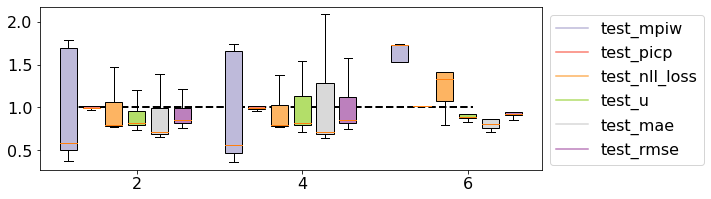

In [21]:
fig = boxplot(df, 'Lookback', 'Set3', plot_measures)
fig.savefig(project_dir+"figures/"+out_folder+"lookback_before.png", bbox_inches='tight')

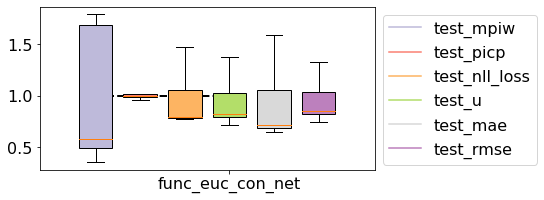

In [22]:
fig = boxplot(df, 'Adjacency', 'Set3', plot_measures)
fig.savefig(project_dir+"figures/"+out_folder+"adjacency_before.png", bbox_inches='tight')

# During

In [23]:
df = results[results['Period'] == "after"]

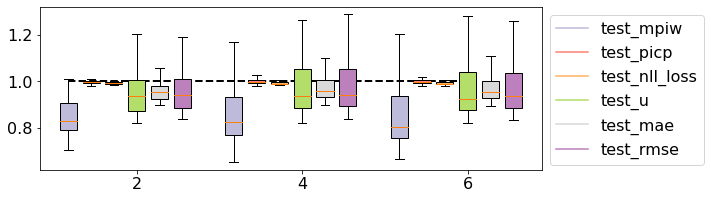

In [24]:
fig = boxplot(df, 'Lookback', 'Set3', plot_measures)
fig.savefig(project_dir+"figures/"+out_folder+"lookback_after.png", bbox_inches='tight')

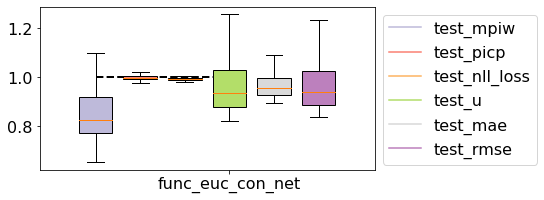

In [25]:
fig = boxplot(df, 'Adjacency', 'Set3', plot_measures)
fig.savefig(project_dir+"figures/"+out_folder+"adjacency_after.png", bbox_inches='tight')

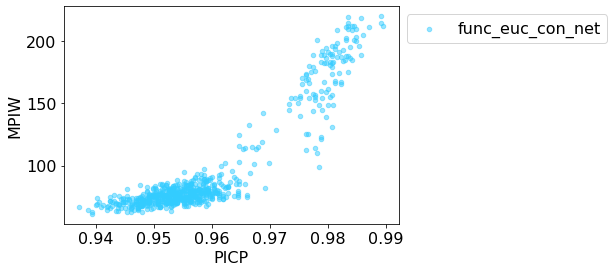

In [26]:
fig, ax = plt.subplots()
cmap = matplotlib.cm.get_cmap('cool')
num = df['Adjacency'].nunique()
colors = {a:cmap(c) for a,c in zip(df['Adjacency'].drop_duplicates(), np.linspace(0.2, 0.8, num))}

for a,g in df.groupby('Adjacency'):
    if len(g)>0:
        ax.scatter(g['test_picp'], g['test_mpiw'], s = 20, alpha=0.5, color=colors[a], label=a)
ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel("PICP")
ax.set_ylabel("MPIW");